In [1]:
import numpy as np
import os, json
import pprint
import matplotlib.pyplot as plt
%matplotlib inline

pp = pprint.PrettyPrinter(indent=4)

with open("system_config.json", "r") as f:
    config_data = json.load(f)

## Get circuit indices
- INPUT
    - meta circuit configuration
- OBJECTIVE
    - to identify the location of where different streams can go and turn it into a usable format
- OUPUT
    - array of two arrays
        - one for concentrate and one for tailings
    - returns the index number of where the 1 was located in the each row of the meta circuit config
        - i.e. whether a stream can flow to the indicated bank or not

In [2]:
meta_circuit_config = np.array(config_data["meta_config"])


def get_circuit_indices(meta_circuit_config):
    circuit_indices = []
    for config_type in meta_circuit_config:
        type_indices = []
        for bank in config_type:
            bank_indices = []
            for i, output_flag in enumerate(bank):
                if (output_flag == 1): bank_indices.append(i)

            if bank_indices:
                type_indices.append(bank_indices)
            else:
                type_indices.append([-1])
        circuit_indices.append(type_indices)

    return circuit_indices

print(f'Number of ones in the meta config for concentrate: {get_circuit_indices(meta_circuit_config)[0]}')
print(f'Number of ones in the meta config for tailings: {get_circuit_indices(meta_circuit_config)[1]}')

Number of ones in the meta config for concentrate: [[1, 2, 4], [2, 4], [4], [1, 2, 4]]
Number of ones in the meta config for tailings: [[3, 5], [3, 5], [3, 5], [0, 5]]


## Extra stuff that I needed for calculations

In [3]:

size = len(meta_circuit_config[0][0]) - 2

circuit_indices = get_circuit_indices(meta_circuit_config)

condensed_configs = [[], []]

#print(circuit_indices)

for type_indices in circuit_indices:
    print(type_indices)

[[1, 2, 4], [2, 4], [4], [1, 2, 4]]
[[3, 5], [3, 5], [3, 5], [0, 5]]


## Total possible number of permutations
- INPUT
    - output from the "get_circuit_indices" function
- OBJECTIVE
    - returns the total number of possible permutations for the concentrate and the tailings
    - does this by multiplying the number of times that a one is located in a row by the next row
    
- OUTPUT
    - integer value
    - this integer value is the total number of possible permutations that can occur

In [4]:
def perm(indices):
    total = 1
    for bank_indices in indices:
        total *= len(bank_indices)
        print(total)
           
    return total

print(circuit_indices)

for i, type_indices in enumerate(circuit_indices):
    ans = perm(type_indices)
    #print(type_indices)
    #print(ans)

[[[1, 2, 4], [2, 4], [4], [1, 2, 4]], [[3, 5], [3, 5], [3, 5], [0, 5]]]
3
6
6
18
2
4
8
16


## Generate the condensed configurations
- generates a UNIQUE **condensed_config** each iteration
- This is not a function

- Steps:
    1. start a counter
    2. calculate total number of configurations using the ***perm()*** function described above
    3. essentially keep generating these new configurations until the counter becomes more than the total number of permutations
    4. iterate through circuit_indices
        - array of two arrays
        - has the index number of each TRUE value in the **meta_config**
        - i.e. **circuit_indices** is the output of the ***get_circuit_indices()*** function
    5. **type_indices** is the value of each element in **circuit_indices**
    6. top one has indices in each row
        - so not necessarily 4 values in each element!
        - the code below now translates that into an array that has 4 values in each element (because there are 4 banks)

In [6]:
size = len(meta_circuit_config[0][0]) - 2
print(f'size (i.e. number of banks) = {size}')

size (i.e. number of banks) = 4


In [16]:
print(circuit_indices[0][0])

[1, 2, 4]


In [21]:
condensed_config = []

for i, type_indices in enumerate(circuit_indices):
    counter = 0
    counters = []
    for j in range(0, size):
        counters.append(0)

    while (counter < perm(type_indices)):
        # pick a config
        
        for k in range(0, size):
            condensed_config.append(type_indices[k][counters[k]])
            
        condensed_configs[i].append(condensed_config)
        counter += 1

        # update counters
        for l in range(0, size):
            wrap = perm(type_indices[l + 1::])
            if (counter % wrap == 0):
                counters[l] = (counters[l] + 1) % len(type_indices[l])

3
6
6
18
2
2
6
1
3
3
3
6
6
18
2
2
6
1
3
3
3
6
6
18
2
2
6
1
3
3
3
6
6
18
2
2
6
1
3
3
3
6
6
18
2
2
6
1
3
3
3
6
6
18
2
2
6
1
3
3
3
6
6
18
2
2
6
1
3
3
3
6
6
18
2
2
6
1
3
3
3
6
6
18
2
2
6
1
3
3
3
6
6
18
2
2
6
1
3
3
3
6
6
18
2
2
6
1
3
3
3
6
6
18
2
2
6
1
3
3
3
6
6
18
2
2
6
1
3
3
3
6
6
18
2
2
6
1
3
3
3
6
6
18
2
2
6
1
3
3
3
6
6
18
2
2
6
1
3
3
3
6
6
18
2
2
6
1
3
3
3
6
6
18
2
2
6
1
3
3
3
6
6
18
2
4
8
16
2
4
8
2
4
2
2
4
8
16
2
4
8
2
4
2
2
4
8
16
2
4
8
2
4
2
2
4
8
16
2
4
8
2
4
2
2
4
8
16
2
4
8
2
4
2
2
4
8
16
2
4
8
2
4
2
2
4
8
16
2
4
8
2
4
2
2
4
8
16
2
4
8
2
4
2
2
4
8
16
2
4
8
2
4
2
2
4
8
16
2
4
8
2
4
2
2
4
8
16
2
4
8
2
4
2
2
4
8
16
2
4
8
2
4
2
2
4
8
16
2
4
8
2
4
2
2
4
8
16
2
4
8
2
4
2
2
4
8
16
2
4
8
2
4
2
2
4
8
16
2
4
8
2
4
2
2
4
8
16


In [50]:
print(f'condensed_config = {condensed_config}')
print(f'condensed_configs - concentrate = {condensed_configs}')
#print(f'condensed_configs - tailings = {condensed_configs[1]}')

condensed_config = [[2, 2, 4, 2], [5, 3, 3, 0]]
condensed_configs - concentrate = [[[1, 2, 4, 1], [1, 2, 4, 2], [1, 2, 4, 4], [1, 4, 4, 1], [1, 4, 4, 2], [1, 4, 4, 4], [2, 2, 4, 1], [2, 2, 4, 2], [2, 2, 4, 4], [2, 4, 4, 1], [2, 4, 4, 2], [2, 4, 4, 4], [4, 2, 4, 1], [4, 2, 4, 2], [4, 2, 4, 4], [4, 4, 4, 1], [4, 4, 4, 2], [4, 4, 4, 4]], [[3, 3, 3, 0], [3, 3, 3, 5], [3, 3, 5, 0], [3, 3, 5, 5], [3, 5, 3, 0], [3, 5, 3, 5], [3, 5, 5, 0], [3, 5, 5, 5], [5, 3, 3, 0], [5, 3, 3, 5], [5, 3, 5, 0], [5, 3, 5, 5], [5, 5, 3, 0], [5, 5, 3, 5], [5, 5, 5, 0], [5, 5, 5, 5]]]


## Generate type config
- INPUT
    - **condensed_config** from above
- OBJECTIVE
    - to generate the full configurations matrix
    - i.e.
        - take input such as [1, 3, 4] and generate output:
        -         [
            [0, 1, 0, 0, 0],
            
            [0, 0, 0, 1, 0],
            
            [0, 0, 0, 0, 1]
        ]
        
- OUTPUT
    - an array of (4) arrays that has the has a value of 1 in the location of the specfied index from the **condensed_config**

- if "j" is equal to the value in the **condensed_config** then put a value of 1 into that spot in that specific configuration
- 

In [ ]:
def generate_type_config(condensed_config):
    type_config = []
    size = len(condensed_config)

    for i in range(0, size):
        row = []
        for j in range(0, size + 2):
            if (j == condensed_config[i]):
                row.append(1)
            else:
                row.append(0)
        type_config.append(row)
    return np.array(type_config)

In [41]:
type_config = []
size = len(condensed_config)

for i in range(0, size):
    row = []
    for j in range(0, size + 2):
        if (j == condensed_config[i]):
            row.append(1)
        else:
            row.append(0)
    type_config.append(row)
        



## Remove configurations that have don't have exactly 2 outlet streams
- i.e. one product (concentrate) and one waste (tailings)
- remove circuit configurations that we don't want before we generate the circuit configurations!
    - reduces the solving time

In [45]:
num_banks = len(config_data["meta_config"][0][0]) - 2
final_condensed_configs = []
for i in condensed_configs[0]:
    for j in condensed_configs[1]:
        if np.count_nonzero(np.array(i) == num_banks) == 1 and np.count_nonzero(np.array(j) == num_banks+1) == 1:
            final_condensed_configs.append([i, j])

print(f'final_condensed_configs - concentrate = {final_condensed_configs}')
print(f'number of configs = {len(final_condensed_configs)}')

final_condensed_configs - concentrate = [[[1, 2, 4, 1], [3, 3, 3, 5]], [[1, 2, 4, 1], [3, 3, 5, 0]], [[1, 2, 4, 1], [3, 5, 3, 0]], [[1, 2, 4, 1], [5, 3, 3, 0]], [[1, 2, 4, 2], [3, 3, 3, 5]], [[1, 2, 4, 2], [3, 3, 5, 0]], [[1, 2, 4, 2], [3, 5, 3, 0]], [[1, 2, 4, 2], [5, 3, 3, 0]], [[2, 2, 4, 1], [3, 3, 3, 5]], [[2, 2, 4, 1], [3, 3, 5, 0]], [[2, 2, 4, 1], [3, 5, 3, 0]], [[2, 2, 4, 1], [5, 3, 3, 0]], [[2, 2, 4, 2], [3, 3, 3, 5]], [[2, 2, 4, 2], [3, 3, 5, 0]], [[2, 2, 4, 2], [3, 5, 3, 0]], [[2, 2, 4, 2], [5, 3, 3, 0]]]
number of configs = 16


## Generate the circuit configurations
- use the **generate_type_config** function

In [43]:
final_configs = []
for condensed_config in final_condensed_configs:
    final_configs.append(np.array([generate_type_config(condensed_config[0]), generate_type_config(condensed_config[1])]))

In [26]:
'''
    This function returns the indices that contain true (i.e. = 1) values for a given configuration.
'''
def get_circuit_indices(meta_circuit_config):
    circuit_indices = []
    for config_type in meta_circuit_config:
        type_indices = []
        for bank in config_type:
            bank_indices = []
            for i, output_flag in enumerate(bank):
                if (output_flag == 1): bank_indices.append(i)

            if bank_indices:
                type_indices.append(bank_indices)
            else:
                type_indices.append([-1])
        circuit_indices.append(type_indices)

    return circuit_indices

'''
    This function basically returns the number of possibilities/permutations for an array of indices.
    The indices in this case are not even necessarily all indices of a type (concentrate/tailings)
        array. They could also be just some of those indices. The idea is to have the total number of
        permutations for x indices.
'''
def perm(indices):
    total = 1
    for bank_indices in indices:
        total *= len(bank_indices)
           
    return total

'''
    This function takes a condensed configuration, such as [1, 3, 4], and generates the full 
        configuration matrix, such as:
        [
            [0, 1, 0, 0, 0],
            [0, 0, 0, 1, 0],
            [0, 0, 0, 0, 1]
        ]

    Called it a "type config" because it is only a configuration matrix for a specific type, ie.
        concentrate or tailings
'''
def generate_type_config(condensed_config):
    type_config = []
    size = len(condensed_config)

    for i in range(0, size):
        row = []
        for j in range(0, size + 2):
            if (j == condensed_config[i]):
                row.append(1)
            else:
                row.append(0)
        type_config.append(row)
    return np.array(type_config)

meta_circuit_config = np.array(config_data["meta_config"])

size = len(meta_circuit_config[0][0]) - 2
circuit_indices = get_circuit_indices(meta_circuit_config)
condensed_configs = [[], []]
# print(circuit_indices)

for i, type_indices in enumerate(circuit_indices):
    counter = 0
    counters = []
    for j in range(0, size):
        counters.append(0)

    while (counter < perm(type_indices)):
        # pick a config
        condensed_config = []
        for k in range(0, size):
            condensed_config.append(type_indices[k][counters[k]])
            print(type_indices[k][counters[k]])
            
        condensed_configs[i].append(condensed_config)
        counter += 1

        # update counters
        for l in range(0, size):
            wrap = perm(type_indices[l + 1::])
            if (counter % wrap == 0):
                counters[l] = (counters[l] + 1) % len(type_indices[l])
        
num_banks = len(config_data["meta_config"][0][0]) - 2
final_condensed_configs = []
for i in condensed_configs[0]:
    for j in condensed_configs[1]:
        if np.count_nonzero(np.array(i) == num_banks) == 1 and np.count_nonzero(np.array(j) == num_banks+1) == 1:
            final_condensed_configs.append([i, j])

final_configs = []
for condensed_config in final_condensed_configs:
    final_configs.append(np.array([generate_type_config(condensed_config[0]), generate_type_config(condensed_config[1])]))
    
# print(f'Number of configurations: {len(final_configs)}')

CPf = 4
CPs = 3
CCf = 3
CCs = 1.5
PYf = 5.1
PYs = 3.7
SC = 250
GNG = 300

# feed = np.array([CPf, CPs, CCf, CCs, PYf, PYf, PYs, SC, GNG])
feed = np.array(config_data["feed"], dtype=np.double)

# -2 because p and w are not banks
num_banks = len(config_data["meta_config"][0][0]) - 2
num_components = len(feed)
# print(num_components)

# pp.pprint(len(final_configs))

1
2
4
1
1
2
4
2
1
2
4
4
1
4
4
1
1
4
4
2
1
4
4
4
2
2
4
1
2
2
4
2
2
2
4
4
2
4
4
1
2
4
4
2
2
4
4
4
4
2
4
1
4
2
4
2
4
2
4
4
4
4
4
1
4
4
4
2
4
4
4
4
3
3
3
0
3
3
3
5
3
3
5
0
3
3
5
5
3
5
3
0
3
5
3
5
3
5
5
0
3
5
5
5
5
3
3
0
5
3
3
5
5
3
5
0
5
3
5
5
5
5
3
0
5
5
3
5
5
5
5
0
5
5
5
5


## Functions

In [28]:
def inlet_mass_frac(M_component):
    if (sum(M_component) == 0):
        return np.full(M_component.shape[0], 0)
    
    Mass_frac = M_component/sum(M_component)
    return Mass_frac

def kinetic_constant():                                 
    return np.array(config_data["k_const"])

def calculate_recoveries(N, τ, bank_input):
    recoveries = []
    Rmax_1 = inlet_mass_frac(bank_input)
    for kmax, Rmax, M_comp in zip(kinetic_constant(), Rmax_1, bank_input):
        recoveries.append(Rmax*(1-(1-(1+kmax*τ)**(1-N))/((N-1)*kmax*τ)))
    return recoveries



## calculate bank inputs
- INPUT
    - **bank_index** ---> which bank it is in the system
    - **circuit_config** ---> which circuit configuration from the **final_configs** array
    - **circuit_values** previous value calculated from the mass balance
- OBJECTIVE
    - to calculate the values going into each bank so that those values can be used for the next iteration
- OUTPUT
    


In [ ]:
def calculate_bank_inputs(bank_index, circuit_config, circuit_values):
    num_banks = circuit_config.shape[1]
    concentrate_col = circuit_config[0][:, bank_index]
    tailings_col = circuit_config[1][:, bank_index]
    bank_inputs = np.zeros((num_components), dtype=np.double)
    for i in range(0, num_banks):
        if (concentrate_col[i] == 1):
            bank_inputs += circuit_values[i][0]
        if (tailings_col[i] == 1):
            bank_inputs += circuit_values[i][1]
            
    return bank_inputs

In [ ]:

def bank(N, τ, bank_input):
    array_conc_out_bank = []
    array_tail_out_bank = []
    for i, R in enumerate(calculate_recoveries(N, τ, bank_input)):
        M_comp = bank_input[i]
        Mconc = M_comp*R
        Mtail = M_comp*(1-R)
        array_conc_out_bank.append(Mconc)
        array_tail_out_bank.append(Mtail)        
    
    return array_conc_out_bank, array_tail_out_bank

## Solve steady-state mass balance

In [52]:
def errf(bank_recoveries):
    total = 0
    num_banks = bank_recoveries.shape[1]
    for i in range(0, num_banks):
        for j in range(0, num_components):
            total += ( (bank_recoveries[0][i][j] - bank_recoveries[1][i][j]) ** 2 ) / (bank_recoveries[0][i][j] ** 2)
    
    return total

def get_output_banks(config):
    product = np.where(config[0][:,-2] == 1)[0]
    waste = np.where(config[1][:,-1] == 1)[0]
    return product, waste
    

crec = np.zeros((len(final_configs), num_components))
trec = np.zeros((len(final_configs), num_components))
cgrades = np.zeros((len(final_configs), num_components))
tgrades = np.zeros((len(final_configs), num_components))

for k, circuit_config in enumerate(final_configs):
    counter = 1
    bank_recoveries = np.zeros((2, num_banks, num_components))
    circuit_values = np.zeros((num_banks, 2, num_components), dtype=np.double)

    while (counter <= 2 or errf(bank_recoveries) > 0.001):
        '''
            new_circuit_values is updated continuously and is eventually used to update circuit_values, which can
                only be updated after all banks have been calculated for the iteration as we do not want
                sequence/dependence to play a role.
        '''
        new_circuit_values = np.zeros((num_banks, 2, num_components), dtype=np.double)

        for i in range(0, num_banks):
            N, τ = config_data["banks"][i]
            # determine inputs from other banks
            bank_inputs = calculate_bank_inputs(i, circuit_config, circuit_values)

            # for the first iteration, we are working with the bank that receives an extra input, namely feed
            if (i == 0):
                new_circuit_values[i] = bank(N, τ, feed + bank_inputs)
            else:
                new_circuit_values[i] = bank(N, τ, bank_inputs)

        circuit_values = new_circuit_values
       
        # update bank recoveries
        bank_recoveries[1] = bank_recoveries[0]
        for i in range(0, num_banks):
            N, τ = config_data["banks"][i]
            bank_inputs = calculate_bank_inputs(i, circuit_config, circuit_values)
            bank_recoveries[0][i] = calculate_recoveries(N, τ, bank_inputs)

        counter += 1
        
    # calculate and store grades and recoveries
    product_bank_index, waste_bank_index = get_output_banks(circuit_config)
    for l in range(0, num_components):
        crec[k][l] = circuit_values[product_bank_index, 0][0][l] / feed[l]
        trec[k][l] = circuit_values[waste_bank_index, 1][0][l] / feed[l]

        cgrades[k][l] = circuit_values[product_bank_index, 0][0][l] / np.sum(circuit_values[product_bank_index, 0][0])
        tgrades[k][l] = circuit_values[waste_bank_index, 1][0][l] / np.sum(circuit_values[waste_bank_index, 1][0])

    if (counter == 3): continue

    print("Iterations required to reach steady state: {}\n".format(counter))
    print("\t\t", end="")
    for i in range(0, num_components):
        print("\tComponent{}\t".format(i+1), end="")
    print("\n")
    for i in range(0, num_banks):
        concentrate = "\t".join(["{:f}".format(i) for i in circuit_values[i][0]])
        tailings = "\t".join(["{:f}".format(i) for i in circuit_values[i][1]])
        print("Concentrate:\t{}\nTailings:\t{}\tBank{}\n".format(concentrate, tailings, i+1))
    
    print("\nCircuit configuration")
    print("Concentrate\t\t\tTailings\n")
    for i in range(0, num_banks):
        conc = "  ".join(["{:d}".format(k) for k in circuit_config[0][i]])
        tail = "  ".join(["{:d}".format(k) for k in circuit_config[1][i]])
        print("{}\t\t{}".format(conc, tail))
            
    
    print("\n\n")

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in double_scalars


Iterations required to reach steady state: 121

			Component1		Component2		Component3		Component4		Component5		Component6		Component7		Component8	

Concentrate:	0.026682	1.868626	1.877205	0.474129	0.966838	0.058219	399.878635	359.949380
Tailings:	29.944536	175.873737	175.855980	89.057841	303.527799	221.852976	12699.101300	2211.593988	Bank1

Concentrate:	0.000001	0.006780	0.006850	0.000434	0.000749	0.000000	37.958647	270.033313
Tailings:	0.061014	3.638906	3.651511	0.921762	2.525138	0.161809	1142.450058	479.288709	Bank2

Concentrate:	0.000000	0.000000	0.000000	0.000000	0.000000	0.000000	0.388424	227.498636
Tailings:	0.000001	0.006693	0.006762	0.000428	0.000743	0.000000	37.204176	42.408851	Bank3

Concentrate:	0.035024	1.811415	1.815620	0.456715	1.588548	0.105850	789.997186	391.832823
Tailings:	29.932690	176.480968	176.469950	89.068716	303.355645	221.821129	12953.124211	2285.559910	Bank4


Circuit configuration
Concentrate			Tailings

0  1  0  0  0  0		0  0  0  1  0  0
0  0  1  0  0  0		0 

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in double_scalars


## Sorted based on grade

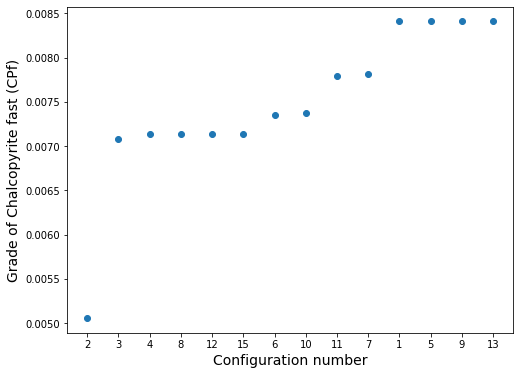

Optimal configuration based on grade = 13
[[[0 0 1 0 0 0]
  [0 0 1 0 0 0]
  [0 0 0 0 1 0]
  [0 0 1 0 0 0]]

 [[0 0 0 1 0 0]
  [0 0 0 1 0 0]
  [0 0 0 1 0 0]
  [0 0 0 0 0 1]]]


In [30]:
Cgrades_c1_unsorted = [x for x in tgrades[:,1] if np.isnan(x) == False]


list_configs = [i for i in range(1, len(final_configs) + 1)]
Cgrades_c1, list_configs_sorted = [list(v) for v in zip(*sorted(zip(Cgrades_c1_unsorted,list_configs)))]
list_configs_sorted_string = [str(x) for x in list_configs_sorted]

Cgrades_c1_sufficient = []
config_number_sufficient = []

for a, i in enumerate(Cgrades_c1):
    if i > 0.002:
        Cgrades_c1_sufficient.append(i)
        config_number_sufficient.append(list_configs_sorted_string[a])

plt.figure(figsize=(8, 6))
plt.plot(config_number_sufficient, Cgrades_c1_sufficient, 'o')
plt.xlabel('Configuration number', fontsize=14)
plt.ylabel('Grade of Chalcopyrite fast (CPf)', fontsize=14)
plt.savefig("Grade vs config number.jpg", bbox_inches='tight')
# plt.xlim(40, 90)
plt.show()

print(f'Optimal configuration based on grade = {config_number_sufficient[-1]}')
print(final_configs[int(config_number_sufficient[-1])-1])

## Sorted based on recovery

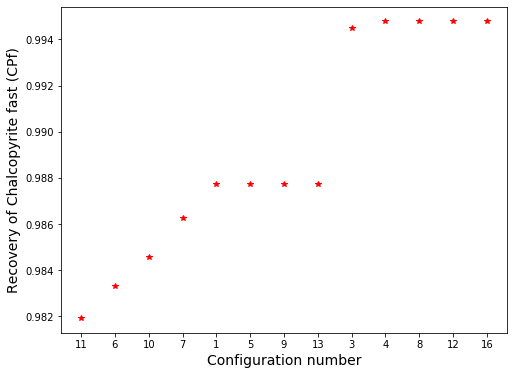

Optimal configuration based on recovery = 16
[[[0 0 1 0 0 0]
  [0 0 1 0 0 0]
  [0 0 0 0 1 0]
  [0 0 1 0 0 0]]

 [[0 0 0 0 0 1]
  [0 0 0 1 0 0]
  [0 0 0 1 0 0]
  [1 0 0 0 0 0]]]


In [31]:
Crec_c1_unsorted = [x for x in trec[:,1] if np.isnan(x) == False]

list_configs = [i for i in range(1, len(final_configs) + 1)]
Crecs_c1, list_configs_sorted = [list(v) for v in zip(*sorted(zip(Crec_c1_unsorted,list_configs)))]
list_configs_sorted_string = [str(x) for x in list_configs_sorted]

Crecs_c1_sufficient = []
config_number_sufficient = []

for a, i in enumerate(Crecs_c1):
    if i > 0.8:
        Crecs_c1_sufficient.append(i)
        config_number_sufficient.append(list_configs_sorted_string[a])

# plt.figure(figsize=(20, 6))
# plt.plot(config_number_sufficient, Crecs_c1_sufficient,'*', color='r')
# plt.xlabel('Configuration number')
# plt.ylabel('Recovery')
# plt.xlim(15, 60)
# plt.savefig("Recovery vs config number.jpg")
# plt.show()

plt.figure(figsize=(8, 6))
plt.plot(config_number_sufficient, Crecs_c1_sufficient,'*', color='r')
plt.xlabel('Configuration number', fontsize=14)
plt.ylabel('Recovery of Chalcopyrite fast (CPf)', fontsize=14)
# plt.xlim(40, 90)
plt.savefig("Recovery vs config number.jpg", bbox_inches='tight')
plt.show()

print(f'Optimal configuration based on recovery = {config_number_sufficient[-1]}')
print(final_configs[int(config_number_sufficient[-1])-1])

# Objective function

#### Revenue

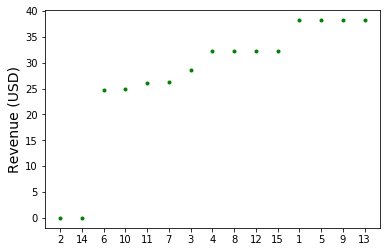

Optimal configuration number = 1
[[[0 0 1 0 0 0]
  [0 0 1 0 0 0]
  [0 0 0 0 1 0]
  [0 0 1 0 0 0]]

 [[0 0 0 1 0 0]
  [0 0 0 0 0 1]
  [0 0 0 1 0 0]
  [1 0 0 0 0 0]]]


In [32]:
p = 0.975
μ = 0.015/1000000
q = 8
Trc = 0.15/10000
Rfc = 0.3
H = 7200

list_configs = [i for i in range(1, len(final_configs) + 1)]


Component_flow_rates_tail = (trec*(config_data["feed"]))[:,0]


Revenue_unsorted = H*Component_flow_rates_tail*(p*(tgrades[:,0]-μ)*(q-Rfc)-Trc)
Revenue_remove_nan_and_zeros = [x for x in Revenue_unsorted if np.isnan(x) == False and x!=0]

list_configs = [i for i in range(1, len(final_configs) + 1)]
Revenue, list_configs_sorted = [list(v) for v in zip(*sorted(zip(Revenue_remove_nan_and_zeros,list_configs)))]
list_configs_sorted_string = [str(x) for x in list_configs_sorted]


plt.plot(list_configs_sorted_string, Revenue,'.', color='g')
# plt.xticks(color='w')
plt.ylabel('Revenue (USD)', fontsize=14)
plt.savefig("Revenue 4 banks.jpg", bbox_inches='tight')
# plt.xlim(60, 90)
plt.show()



optimal_config_revenue = np.array(list_configs_sorted_string)[np.where(Revenue==np.max(Revenue))][0]
print(f'Optimal configuration number = {optimal_config_revenue}')

print(final_configs[np.max(list_configs_sorted)-1])

#### Profit before taxes

In [34]:
Fk = np.array(config_data["feed"])*1000
MFk = Fk/sum(Fk)
Ni = np.array(config_data["banks"])[:,0]
τi = np.array(config_data["banks"])[:,1]
ρ_k = np.array([4190, 4190, 5500, 5500, 5000, 5000, 2650, 2000])

ρ_p = 1/(sum(MFk/ρ_k))
print(ρ_p)

Vi = np.sum(Fk)*τi/ρ_p

If = 2000000
td = 3.636/100


Pk = 0.3055   # Hawaii
Cop = np.sum(Ni*Vi*Pk*H)
print(f'Cop = {Cop}')

PB = Revenue - Cop - If/td
# print(PB)

2287.761238986797
Cop = 142778937.6764964


#### Calculate Vcell from $\tau$

$\tau$ = $\frac{Vcell\cdot\rho}{Feed}$

In [ ]:
N = np.array(config_data["banks"])[:,0]
τ = np.array(config_data["banks"])[:,1]
feed = np.array(config_data["feed"])
ρfeed = np.array([1000, 1000, 1000, 1000])

Vcell_per_bank = τ*feed/ρfeed*N
print(f'Volume of cells per bank = {Vcell_per_bank}')

In [ ]:
def Capital_cost():
    FL = 3
    FLw = 0.9
    Ifi = 105.7 + 10.72*sum(Vcell_per_bank) - 149.1*sum(Vcell_per_bank)**2
    
    If = FL*Ifi
    Iw = FLw*Ifi
    
    return If, Iw

If = Capital_cost()[0]
Iw = Capital_cost()[1]

print(f'Fixed capital (If) = {If}')
print(f'Wokring capital (Iw) = {Iw}')

In [ ]:
def Revenue():
    p = 0.975
    µ = 0.015
    Trc = 0.15
    Rfc = 0.3
    H = 7200
    q = 8
    
    Revenue = (p*(max(Cgrades_c1)-µ)*(q-Rfc) - Trc)*H
    
    return Revenue

Revenue = Revenue()
print(f'Revenue = {Revenue}')

In [ ]:
Vi_list = np.linspace(1, 15)
Ifi_list = (105.7 + 10.72*Vi_list + 149.1*Vi_list**2)#/Vi_list

plt.plot(Vi_list, Ifi_list)

In [ ]:
Vi = 0.1
Ifi_list = 105.7 + 10.72*Vi - 149.1*Vi**2

print(Ifi_list)